# Subject 6: Around Simpson's Paradox

![SegmentLocal](simpson.gif "segment")
(Copyright: [tenor.com](https://tenor.com/search/homer-thinking-gifs))

 __Prerequisites__ : Averaging and ratio calculation, simple graphical presentation techniques, possibly logistic regression

<!-- In 1972-1974 a one-in-six survey of the electoral roll, largely -->
<!-- concerned with thyroid disease and heart disease, was carried out in -->
<!-- Whickham, a mixed urban and rural district near Newcastle upon Tyne, -->
<!-- United Kingdom (Tunbridge et al. 1977). Twenty years later a follow-up -->
<!-- study was conducted (Vanderpump et al. 1995). Some of the results deal -->
<!-- with smoking habits and whether or not the individual survived until -->
<!-- the second survey. For the sake of simplicity we have restricted -->
<!-- ourselves to women, and within them to the 1,314 who were classified -->
<!-- either as current smokers or as never having smoked; there were -->
<!-- relatively few women at the first survey (162) who had smoked but -->
<!-- stopped, and only 18 whose smoking habits were not recorded. The -->
<!-- 20-year survival status was determined for all the women in the -->
<!-- original survey. -->


In 1972-1974, in Whickham, a town in the north-east of England,
located approximately 6.5 kilometres south-west of Newcastle upon Tyne,
a survey of one-sixth of the electorate was conducted in order to inform
work on thyroid and heart disease (Tunbridge and
al. 1977). A continuation of this study was carried out twenty years later.
(Vanderpump et al. 1995). Some of the results were related to
smoking and whether individuals were still alive at the time of the
second study. For the purpose of simplicity, we will restrict the data to women and among these to the 1314 that were categorized as "smoking currently" or "never smoked". There were relatively few
women in the initial survey who smoked but have since quit
(162) and very few for which information was not available
(18). Survival at 20 years was determined for all women of the first survey.

All these data are available in this [file
CSV](https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/blob/master/module3/Practical_session/Subject6_smoking.csv). You will find on each line if the
person smokes or not, whether alive or dead at the time of the
second study, and his age at the time of the first survey. 

This exercise can be done in either R or Python.

__Your mission, should you choose to accept it:__

1. Tabulate the total number of women alive and dead over the period according to their smoking habits. Calculate in each group (smoking/non-smoking) the mortality rate (the ratio of the number of women who died in a group to the total number of women in that group). You can graph these data and calculate confidence intervals if you wish. Why is this result surprising?
2. Go back to question 1 (numbers and mortality rates) and add a new category related to the age group. For example, the following classes will be considered: 18-34 years, 34-54 years, 55-64 years, over 65 years.

   Why is this result surprising? Can you explain this paradox? Similarly, you may wish to provide a graphical representation of the data to support your explanations.
3. In order to avoid a bias induced by arbitrary and non-regular age groupings, it is possible to try to perform a logistic regression. If we introduce a `Death` variable of `1` or `0` to indicate whether the individual died during the 20-year period, we can study the `Death ~ Age` model to study the probability of death as a function of age according to whether one considers the group of smokers or non-smokers. Do these regressions allow you to conclude or not on the harmfulness of smoking?  You will be able to propose a graphical representation of these regressions (without omitting the regions of confidence).
4. Submit your work in FUN

### Standard import

In [1]:
import numpy as np  # For maths
import pandas as pd  # For data frames
import matplotlib.pyplot as plt  # For plots
import seaborn as sns  # For nice plots
from matplotlib.ticker import FuncFormatter  # To format % in axis
from IPython.core.display import display, HTML  # For nice display of data frames

### Copy to local data (if not there already)

In [2]:
data_url = "https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv"

data_file = "smoking_data.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

### Load data 

In [3]:
raw_data = pd.read_csv(data_file)
raw_data.head()

Smoker Status   Age
0    Yes  Alive  21.0
1    Yes  Alive  19.3
2     No   Dead  57.5
3     No  Alive  47.1
4    Yes  Alive  81.4

### Preprocessing

Check that "Smoker" and "Satus" have only two possible values:

In [4]:
raw_data["Smoker"].unique(), raw_data["Status"].unique()

(array(['Yes', 'No'], dtype=object), array(['Alive', 'Dead'], dtype=object))

Convert them to boolean for a more standardised analysis downstream.
In particular, there is no missing values for those (otherwise they would show as NaN or some other tag). Also, rename "Status" for clarity.

In [5]:
df = raw_data.copy()
 
df["Smoker"] = df["Smoker"] == "Yes"
df["Status"] = df["Status"] == "Dead"

df.rename(columns={"Status": "Dead"}, inplace=True)

df.head()

Smoker   Dead   Age
0    True  False  21.0
1    True  False  19.3
2   False   True  57.5
3   False  False  47.1
4    True  False  81.4

Check for missing values in "Age":

In [6]:
print("{:.0f} missing value(s) in 'Age'".format(df["Age"].isna().sum()))    

0 missing value(s) in 'Age'


## 1. Mortality rates among smokers vs. non-smokers

First, group by $Smoker$:

In [7]:
df_by_smoker = df.groupby(by=["Smoker"])

Number of deaths:

In [8]:
df_by_smoker.sum()[["Dead"]].astype(int)

Dead
Smoker      
False    230
True     139

Total number per class (smokers vs. non-smokers):

In [9]:
df_by_smoker.count()[["Dead"]].astype(int)

Dead
Smoker      
False    732
True     582

Mortality rate (ratio of dead / number within the class):

In [10]:
display(
    HTML(
        df_by_smoker.mean()[["Dead"]].to_html(formatters={"Dead": "{:,.1%}".format})
    )
)

### Visualisation

We summarise these results using a bar plot. The black lines represent 95% confidence intervals around the mean mortality rates.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


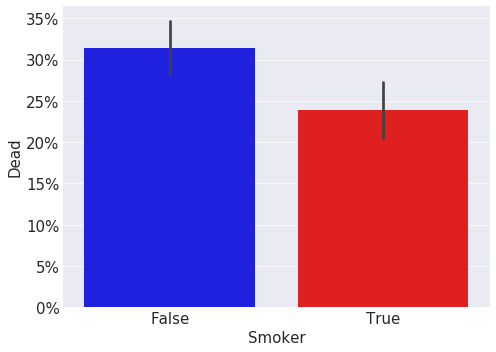

In [11]:
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(7, 5), nrows=1, ncols=1)

    sns.barplot(data=df, x="Smoker", y="Dead", ax=ax, ci=95, palette=("blue", "red"))  # Note: in recent versions of seaborn, we should rather use errorbar=('ci', 95).

    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.xaxis.get_label().set_fontsize(15)
    ax.yaxis.get_label().set_fontsize(15)
    
    plt.tight_layout()
    plt.show()

At first, this is surprising: the mortality rate appears to be lower in the smoker group.

To confirm this, let's perform a statistical test (this is actually equivalent to the confidence intervals suggested in the question). A simple t-test will do (although it is not the most appropriate here -- categorical data -- it is simple and it is not the focus of this exercise).

In [12]:
from scipy.stats import ttest_ind

df_smoker = df[df["Smoker"]]
df_nonsmoker = df[~df["Smoker"]]
ttest_ind(df_smoker["Dead"], df_nonsmoker["Dead"], equal_var=False)

Ttest_indResult(statistic=-3.057733462432345, pvalue=0.002276255348902961)

The p-value is less than 0.05, i.e. we reject (at significance level 95%) the null hypothesis that both smokers and non-smokers have the same mortality rate.

**Conclusion**: the mortality rate among smokers is significantly lower than among nonsmokers.

## 2. Mortality rates among smokers vs. non-smokers by age class

First, let us split the data frame in four age classes: 18-34, 35-54, 55-64, 65+. We encapsulate this in a function.

In [13]:
def get_age_class(age):
    if age < 18:
        return "18-"  # To check that we do not have age < 18
    elif age <= 34:
        return "18-34"
    elif age <= 54:
        return "35-54"
    elif age <= 64:
        return "55-64"
    else:
        return "65+"


df["Age_class"] = df["Age"].apply(get_age_class)  # Remark: this is kind of slow, but it is clear and it will do for this simple analysis.
age_classes = np.sort(df["Age_class"].unique())

Check that nobody is younger than 18.

In [14]:
print("{:.0f} individual(s) younger than 18".format((df["Age_class"] == "18-").sum()))

0 individual(s) younger than 18


Display the mean mortality rates split by age class.

In [15]:
display(
    HTML(
        df.groupby(by=["Age_class", "Smoker"]).mean()[["Dead"]].to_html(formatters={"Dead": "{:,.1%}".format})
    )
)

## Visualisation

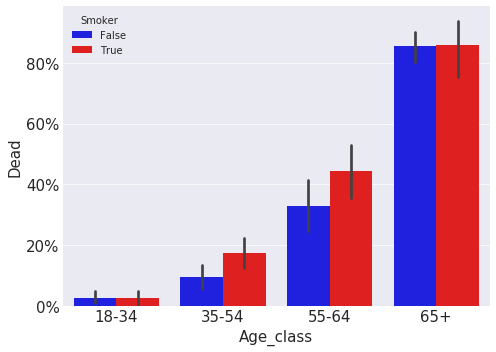

In [16]:
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(7, 5), nrows=1, ncols=1)

    sns.barplot(data=df, x="Age_class", y="Dead", hue="Smoker", ax=ax, ci=95, palette=("blue", "red"), order=tuple(age_classes))  # Note: in recent versions of seaborn, we should rather use errorbar=('ci', 95).

    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.xaxis.get_label().set_fontsize(15)
    ax.yaxis.get_label().set_fontsize(15)
    
    plt.tight_layout()
    plt.show()

We redo the statistical tests.

In [17]:
df_smoker = df[df["Smoker"]]
df_nonsmoker = df[~df["Smoker"]]

for age_class in age_classes:
    df_smoker_age_class = df_smoker[df_smoker["Age_class"] == age_class]
    df_nonsmoker_age_class = df_nonsmoker[df_nonsmoker["Age_class"] == age_class]
    print(ttest_ind(df_smoker_age_class["Dead"], df_nonsmoker_age_class["Dead"], equal_var=False))

Ttest_indResult(statistic=0.013780528783028018, pvalue=0.9890122465905076)
Ttest_indResult(statistic=2.4009857289248324, pvalue=0.01677328896330688)
Ttest_indResult(statistic=1.783075769977916, pvalue=0.07588466008529735)
Ttest_indResult(statistic=0.03927297913991199, pvalue=0.9687782291030265)


**Conclusion**: when inspecting by age class, the conclusion is reversed, i.e. within each age class, the mortality rate is higher among smokers. 

Note that this increase of mortality rate is not significant for the youngest and oldest age classes ($p\gg0.05$). This is intuitive: tobacco-related health conditions take many years to develop, therefore they do not significantly impact the mortality rate of young people. On the other hand, the elderly suffer from many possible health threats that are unrelated to their smoking status, which tend to erase disparities between smokers and non-smokers. 

For the other two age classes (35-54 and 55-64), the increases of mortality rates are respectively weakly significant ($p=0.076$) and significant ($p=0.017$). In particular, this last class comprises aging people for which a lifetime of smoking may is likely to have had the time to trigger tobacco-related conditions.

### Why is it seemingly contradictory with the age-agnostic analysis of question 1?

In this study, $Age$ is a typical *confounding* variable. In simple terms, $Age$ conditions the distributions of the $Smoker$ variable. In the figure below, we report the percentage of smokers per age class.

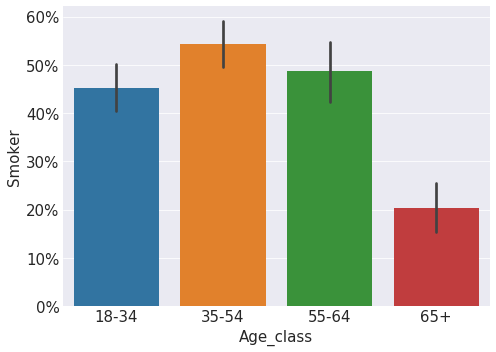

In [18]:
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(7, 5), nrows=1, ncols=1)

    sns.barplot(data=df, x="Age_class", y="Smoker", ax=ax, ci=95, order=tuple(age_classes))  # Note: in recent versions of seaborn, we should rather use errorbar=('ci', 95).

    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.xaxis.get_label().set_fontsize(15)
    ax.yaxis.get_label().set_fontsize(15)
    
    plt.tight_layout()
    plt.show()

We see that smokers are underrepresented among the elderly compared to the other three age classes (probably because many long-time smokers quit when they grow old and start developing tobacco-related health conditions). Therefore, in the overall analysis of question 1, $Age$ acted as a proxy for the absence of smoking habit. Since the mean mortality rate is higher among the elderly (irrespective of the cause -- after all, they may simply die of old age), this creates a spurious negative correlation between $Smoker$ and $Dead$ (non-smokers are more likely older, and thus more likely to have a high mortality rate).

In other words, what was detected in question 1 was a *correlation*, but not the underlying mechanism of *causality*.

![SegmentLocal](correlation.png "segment")

(Copyright: [xkcd](https://xkcd.com/552/))

## 3. Mortality rates among smokers vs. non-smokers by age using logistic regression

We perform a logistic regression for the model $Dead = \beta \times Age + \alpha$ ($\beta$ is the regression coefficient, $\alpha$ is the intercept). Compared to the previous question, $Age$ is treated as a continuous covariate rather than categorised into age classes.

In [19]:
import statsmodels.api as sm

log_reg_smoker = sm.Logit(df_smoker["Dead"], sm.add_constant(df_smoker["Age"])).fit()
log_reg_nonsmoker = sm.Logit(df_nonsmoker["Dead"], sm.add_constant(df_nonsmoker["Age"])).fit()

Optimization terminated successfully.
         Current function value: 0.412727
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.354560
         Iterations 7


We plot the resulting hazard curves (mortality rates as a function of age). 

The confidence bands are obtained using the the classical transformation of hazard rates: use the Gaussian 95% confidence interval $[mean \pm 1.96 \times standard\ error]$ in logit space, then transform back into a probability (using the *expit* function).

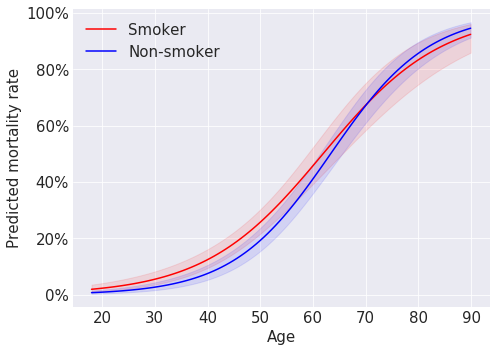

In [20]:
from scipy.special import expit, logit

ages = np.linspace(df["Age"].min(), df["Age"].max(), 100)

pred_smoker = log_reg_smoker.predict(sm.add_constant(ages))
pred_nonsmoker = log_reg_nonsmoker.predict(sm.add_constant(ages))

se_smoker = np.sqrt(np.array([x @ log_reg_smoker.cov_params() @ x for x in sm.add_constant(ages)]))
se_nonsmoker = np.sqrt(np.array([x @ log_reg_nonsmoker.cov_params() @ x for x in sm.add_constant(ages)]))


with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(7, 5), nrows=1, ncols=1)

    ax.plot(ages, pred_smoker, color="red", label="Smoker")
    ax.fill_between(ages, y1=expit(logit(pred_smoker) - 1.96 * se_smoker), y2=expit(logit(pred_smoker) + 1.96 * se_smoker), alpha=0.1, color="red")
    
    ax.plot(ages, pred_nonsmoker, color="blue", label="Non-smoker")
    ax.fill_between(ages, y1=expit(logit(pred_nonsmoker) - 1.96 * se_nonsmoker), y2=expit(logit(pred_nonsmoker) + 1.96 * se_nonsmoker), alpha=0.1, color="blue")
    
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

    ax.set_xlabel("Age", fontsize=15)
    ax.set_ylabel("Predicted mortality rate", fontsize=15)
    ax.legend(loc='upper left', prop={'size': 15})
    ax.tick_params(axis='both', which='major', labelsize=15)

    plt.tight_layout()
    plt.show()

**Conclusion**: the logistic regression confirms the analysis of question 2, namely that middle-aged people exhibit a higher mortality rate when smoking, while the young and the elderly have similar mortality rates.